In [1]:
# 爱因斯坦求和约定
import numpy as np

In [6]:
# 延轴计算张量元素的和
a = np.arange(64).reshape(4,4,4)
c = a.sum(axis=2)
ci = np.einsum('ijk->jk', a)
cj = np.einsum('ijk->ik', a)
ck = np.einsum('ijk->ij', a)
# print(a)
# 将jk换成省略号，以表示剩下的所有维度
print(np.einsum('i...->...',a))
print(c)
print(ci)
print(ck)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]
[[  6  22  38  54]
 [ 70  86 102 118]
 [134 150 166 182]
 [198 214 230 246]]
[[ 96 100 104 108]
 [112 116 120 124]
 [128 132 136 140]
 [144 148 152 156]]
[[  6  22  38  54]
 [ 70  86 102 118]
 [134 150 166 182]
 [198 214 230 246]]
[[ 96 100 104 108]
 [112 116 120 124]
 [128 132 136 140]
 [144 148 152 156]]
[[  6  22  38  54]
 [ 70  86 102 118]
 [134 150 166 182]
 [198 214 230 246]]


In [3]:
# 矩阵乘法
a = np.ones((3,2))
b = np.ones((2,5))
print(np.dot(a,b))
print(np.einsum('ij,jk->ik',a,b))

[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


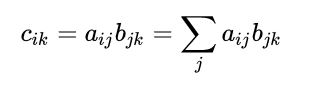

In [4]:
# 张量计算
a = np.random.rand(64,128,128,64)
b = np.random.rand(64,128,128,64)
%time np.einsum('ijkl,ijkl->',a,b)
%time (a*b).sum()

Wall time: 76.8 ms
Wall time: 502 ms


16779133.489910793

In [9]:
# 张量求和
%time  np.einsum('ijkl->',a)
%time a.sum()

Wall time: 45.9 ms
Wall time: 104 ms


33556012.82828383

In [10]:
c = np.random.rand(2024,2024)
d = np.random.rand(2024,2024)
%time np.einsum('ik,kj->ij',c,d)
%time np.dot(c,d)
%time np.einsum('ik,kj->ij',c,d,optimize=True)

Wall time: 6.26 s
Wall time: 161 ms
Wall time: 178 ms


array([[517.44481471, 514.9487279 , 499.67976437, ..., 512.81624581,
        493.46668711, 517.17567652],
       [520.41713576, 524.55940474, 512.24535894, ..., 522.35342103,
        496.14992178, 515.90764403],
       [516.59461471, 519.9219841 , 506.00626432, ..., 521.53463185,
        491.88254016, 515.2228743 ],
       ...,
       [512.60463769, 511.29063356, 497.1988283 , ..., 503.65478   ,
        493.04624966, 511.30587232],
       [516.97689954, 515.55466396, 511.52823092, ..., 517.18495565,
        503.19663037, 512.47952578],
       [509.18238109, 512.31381745, 496.32037027, ..., 510.9603518 ,
        487.43494578, 505.00228139]])

optimize : {False, True, ‘greedy’, ‘optimal’}, optional

In [11]:
a = np.random.rand(128, 128, 64, 64)
b = np.random.rand(128, 128, 64, 64)
%time np.tensordot(a,b,([0, 1],[0, 1]))
%time np.einsum('ijkl,ijmn->klmn',a,b)
%time np.einsum('ijkl,ijmn->klmn',a,b,optimize=True)

Wall time: 5.62 s
Wall time: 4min 24s
Wall time: 5.75 s


array([[[[4086.69192813, 4081.31823039, 4105.19264101, ...,
          4074.60196641, 4065.93515077, 4078.3183553 ],
         [4085.33160563, 4113.34283392, 4052.11015953, ...,
          4104.50295998, 4101.09884342, 4080.40536214],
         [4084.99675705, 4101.21582833, 4063.46601347, ...,
          4059.6719189 , 4094.39934358, 4034.05720311],
         ...,
         [4047.83915583, 4035.3294033 , 4065.93521431, ...,
          4072.97533187, 4054.7125293 , 4064.19792467],
         [4090.83427159, 4122.86168886, 4074.77291706, ...,
          4075.5789532 , 4088.21715165, 4101.23441573],
         [4104.17946569, 4044.65662386, 4100.54953101, ...,
          4057.8077182 , 4094.65386215, 4066.03787107]],

        [[4108.19971497, 4050.74329471, 4102.96004993, ...,
          4078.73749227, 4069.12753447, 4081.19975641],
         [4098.87354502, 4105.15357916, 4038.79197699, ...,
          4087.78036014, 4082.26394717, 4075.80210935],
         [4074.85467637, 4100.31614909, 4061.22060868, .

In [10]:
a = np.ones((3,3))
b = np.ones((3,3))*2
c = np.ones((3,3))*3
print(a)
print(b)
print(np.einsum('...,...,...->...',a,b,c))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


In [4]:
np.einsum('ij->ji', np.zeros((2,3)))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [9]:
# 注意可以使用 ji 直接转置
np.einsum('ji,jk->ik',np.ones((3,2)),np.ones((3,2))*3)

array([[9., 9.],
       [9., 9.]])

In [13]:
np.einsum('ij,kj->ik',np.ones((2,3)),np.ones((5,3))*3)

array([[9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9.]])

In [15]:
np.einsum('ij,kj->',np.ones((2,3)),np.ones((5,3))*3)

90.0